In [49]:
using PyPlot, SeisPlot, SeisReconstruction, SeisProcessing, SeisMain

# add references..


In [151]:
# Create linear events

d = SeisParabEvents(dt=0.004,nx1=40,nx2=44, 
                    p1 = [-4.4, -4.1, -1.1],
                    p2 = [-4.4, 4.1, -2.1],
                    tau=[1., 1/3, 0.8],dx1=15,dx2=10); 

dtrue=copy(d)
#Randomly decimate, perc=80 means that 80% of the bins are empty

dec = SeisDecimate(d;perc=50);

In [152]:

dmwni = SeisMWNI(dec;dt=0.004,fmax=80,padt=2,padx=2,Niter_internal=10,Niter_external=3,mu=0.00001);

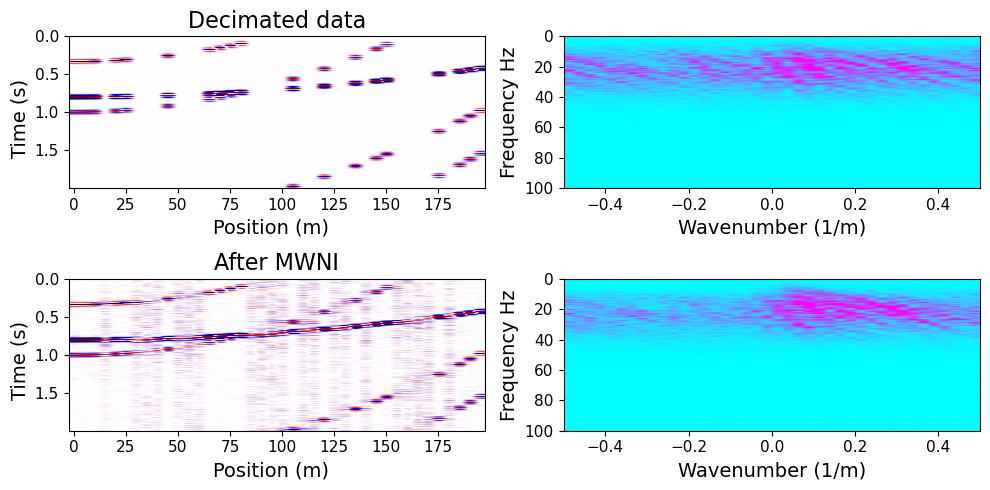

In [153]:
figure(1)

subplot(221)
SeisPlotTX(dec[:,:,1],cmap="seismic",fignum=1,pclip=99,title="Decimated data",dy=0.004,ylabel="Time (s)", dx=5, xlabel="Position (m)")
subplot(222)
SeisPlotFK(dec[:,:,1], cmap="cool", dy=0.004,hbox=5,pclip=99,fignum=1)

subplot(223)
SeisPlotTX(dmwni[:,:,1,1,1],cmap="seismic",fignum=1,pclip=99,title="After MWNI",dy=0.004,ylabel="Time (s)", dx=5, xlabel="Position (m)")
subplot(224)
SeisPlotFK(dmwni[:,:,1,1,1],cmap="cool",dy=0.004,fignum=1,pclip=99)
tight_layout()
gcf()

In [141]:
SNR_db=MeasureSNR(dtrue,dropdims(dmwni,dims=(4,5)),db=true)
println("SNR of of reconstructions is: ",floor(SNR_db), " dB")

SNR of of reconstructions is: 19.0 dB


MeasureSNR (generic function with 1 method)